# Importation and data preparation 

* Importation  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

STEP 1 : Importing and Splitting data 

- We will split the data into training and testing sets. We will train the model with 70% of the samples and test with the remaining 20% 

In [2]:
dff=pd.read_csv("C:/Users/Dell 7470/Desktop/test_xcelerit/data_xcelerit.csv")
x = dff.drop('vola',axis=1)
y = dff.vola
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

- By looking to the correlation matrix and data plot ( in dataset.ipnyb ) we notice that even {nu} ( the most corelate feature with {vola} ) doesn’t look to be following exactly a linear line. So we will apply Polynomiale regression model to our dataset


# Building and training the first model 

- To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn. Next, we train the model using Linear Regression
- We will loop on 10  degrees in order to benchmarks between different degrees

In [11]:
degrees = np.arange(1, 10)
def model(x_train, x_test, y_train, y_test):

    rmses=[]
    r2=[]
    for deg in degrees:
    
        # Train features
        
        poly_features = PolynomialFeatures(degree=deg, include_bias=False)
        x_poly_train = poly_features.fit_transform(x_train)

        # Linear regression
        
        poly_reg = LinearRegression()
        poly_reg.fit(x_poly_train, y_train)
        
        # Compare with test data
        
        x_poly_test = poly_features.fit_transform(x_test)
        print(x_poly_test.shape)
        poly_predict = poly_reg.predict(x_poly_test)
        
        
        # metrics 
        
        poly_mse = mean_squared_error(y_test, poly_predict) # Mean-square deviation
        poly_r2=r2_score(y_test,poly_predict)               #R2
        poly_rmse = np.sqrt(poly_mse)                       # Root-mean-square deviation
        
        # arrays of differents values of r2 and RMSES 
        r2.append(poly_r2)
        rmses.append(poly_rmse)
        
        # to return the best model and the best degree 
        if poly_rmse == min(rmses):
            lr_model=poly_reg
            index=deg
    
    return index,lr_model,rmses,r2

In [12]:
(degree,best_model,rmses,r2)=model(x_train, x_test, y_train, y_test)

(300, 7)
(300, 35)
(300, 119)
(300, 329)
(300, 791)
(300, 1715)
(300, 3431)
(300, 6434)
(300, 11439)


#  Evaluating the model

- We will plot differents walues of R2 and RMSE

In [5]:
def visualization(rmses,r2):
    # visualization of RMSE
    fig = plt.figure(figsize=(10.7,5.27))
    ax = fig.add_subplot(111)
    ax.plot(degrees, rmses)
    ax.set_yscale('log')
    ax.set_title('Cuvre of RMSE')
    ax.set_xlabel('Degree')
    ax.set_ylabel('RMSE') 
    # visualization of R2
    fig = plt.figure(figsize=(10.7,5.27))
    ax = fig.add_subplot(111)
    ax.plot(degrees, r2)
    ax.set_yscale('log')
    ax.set_title('Curve of R2')
    ax.set_xlabel('Degree')
    ax.set_ylabel('r2') 
    

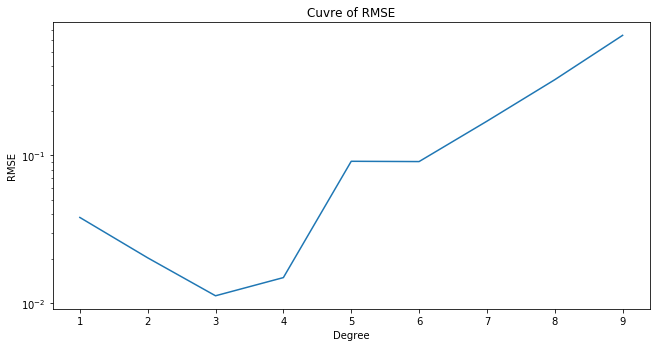

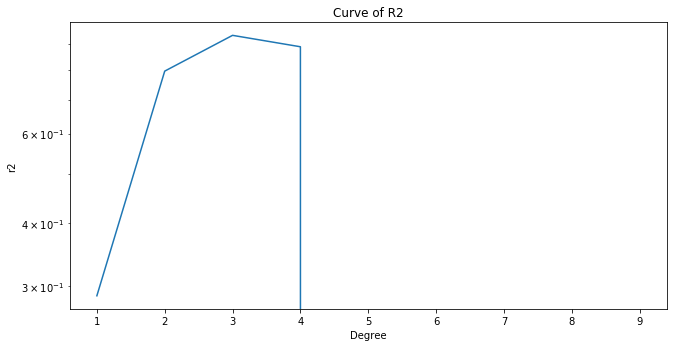

In [6]:
visualization(rmses,r2)

# Metrics  

In [7]:
print(' the RMSE of our best model is :',rmses[degree])
print(' the R2 of our best model is :',r2[degree])

 the RMSE of our best model is : 0.014946522031600833
 the R2 of our best model is : 0.8902728643787263


# Saving the best model

In [8]:
import pickle
import os

path=input('Print your path to save your model :')
pickle.dump(model, open(os.path.join(path, 'Polynomial_regression.pickle'), 'wb'), protocol=4)

Print your path to save your model :


# Predict new instance

In [21]:
if __name__=='__main__':
        modelfile_mlp = 'C:/Users/Dell 7470/Desktop/test_xcelerit/Polynomial_regression.pickle'
        mlp = pickle.load(open(modelfile_mlp, 'rb'))
                               

In [16]:
#using it in interface 
polynomial_features= PolynomialFeatures(degree=3)
data_poly = polynomial_features.fit_transform(dff)

def prict_vola(lst):
    df = pd.DataFrame([lst]) 
    poly_data=polynomial_features.fit_transform(df)
    print(poly_data)
    vola=best_model.predict(poly_data)
    return vola
prict_vola([0.305983,0.552548,0.036924,0.035264,3.500000,0.006076,0.312358])

ValueError: X shape does not match training shape